<font size="+5">#09. Cluster Analysis con k-Means</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

# Load the Data

> - Simply execute the following lines of code to load the data.
> - This dataset contains **statistics about Car Accidents** (columns)
> - In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [34]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
UT,11.3,4.859,1.808,9.944,10.848,809.38,109.48
KS,17.8,4.806,4.272,13.706,15.130,780.45,133.80
WV,23.8,8.092,6.664,23.086,20.706,992.61,152.56
WY,17.4,7.308,5.568,14.094,15.660,791.14,122.04
IA,15.7,2.669,3.925,15.229,13.659,649.06,114.47


# `KMeans()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [37]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters=3)

In [39]:
model.fit()

TypeError: fit() missing 1 required positional argument: 'X'

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

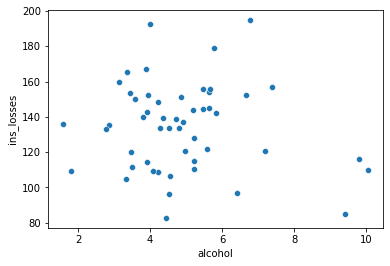

In [40]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df)

### Finally `fit()` the Model

In [41]:
dfsel = df[['alcohol', 'ins_losses']].copy()

In [42]:
dfsel

,alcohol,ins_losses
abbrev,,
AL,5.640,145.08
AK,4.525,133.93
AZ,5.208,110.35
AR,5.824,142.39
CA,3.360,165.63
CO,3.808,139.91
CT,3.888,167.02
DE,4.860,151.48
DC,1.593,136.05


In [43]:
model.fit(X=dfsel)

KMeans(n_clusters=3)

## `predict()` the Cluster for One `USA State`

> **Programming thiking:**
>
> - Which `function()` can we use to make a prediction?
> - How can you answer yourself **without searching in Google**?

In [44]:
ejemplo = dfsel.sample()

In [45]:
ejemplo

,alcohol,ins_losses
abbrev,,
MO,5.474,144.45


In [46]:
model.predict(ejemplo)

array([2], dtype=int32)

## Get the `cluster` for all USA States

> - `model.` + `↹`

In [47]:
pred = model.predict(X=dfsel)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [48]:
dfsel['cluster'] = pred

## Model Visualization

> - You may `hue=` the points with the `cluster` column

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

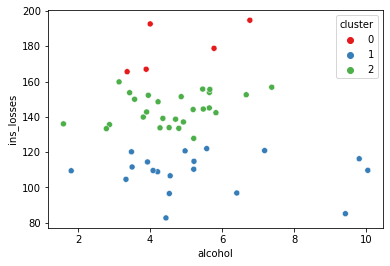

In [49]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')

In [50]:
import matplotlib.pyplot as plt

(0.0, 200.0)

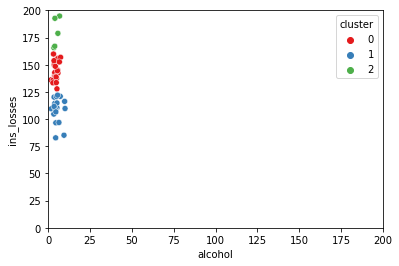

In [32]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)

## Model Interpretation

> - Do you think the model **makes sense**?
> - Which **variable is the most important** to determine the cluster?

In [33]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Conclusion

> - You need to `scale` the data
> - Every time the algorithm computes `distances`
> - Between `different variables`
> - Because it's **not the same to increase 1kg of weight than 1m of height**

# Draw Weight Height Axes Min Max Scaler 0 - 1

# `MinMaxScaler()` the data

> - `scaler.fit_transform()`

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
dfsel = df[['alcohol', 'ins_losses']].copy()

In [56]:
scaler = MinMaxScaler()
scaler.__dict__

{'feature_range': (0, 1), 'copy': True, 'clip': False}

In [57]:
import pandas as pd

In [81]:
dfnorm = pd.DataFrame(scaler.fit_transform(dfsel), columns=dfsel.columns, index=dfsel.index)

In [82]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


<AxesSubplot:>

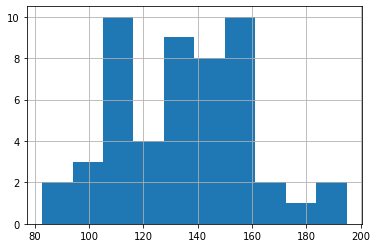

In [83]:
df.ins_losses.hist()

<AxesSubplot:>

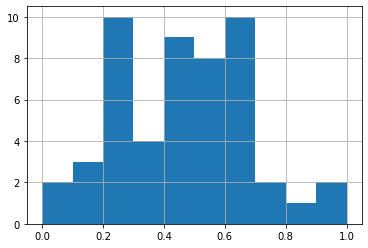

In [84]:
dfnorm.ins_losses.hist()

In [85]:
dfnorm.head()

,alcohol,ins_losses
abbrev,,
AL,0.479218,0.556369
AK,0.347188,0.456842
AZ,0.428064,0.246363
AR,0.501007,0.532357
CA,0.209236,0.739802


In [86]:
scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['alcohol', 'ins_losses'], dtype=object),
 'n_features_in_': 2,
 'n_samples_seen_': 51,
 'scale_': array([0.11841326, 0.00892618]),
 'min_': array([-0.18863233, -0.73864144]),
 'data_min_': array([ 1.593, 82.75 ]),
 'data_max_': array([ 10.038, 194.78 ]),
 'data_range_': array([  8.445, 112.03 ])}

# `KMeans()` Model with *Scaled Data*

In [87]:
from sklearn.cluster import KMeans

In [88]:
model = KMeans(n_clusters=3)

In [89]:
model.fit

<bound method KMeans.fit of KMeans(n_clusters=3)>

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

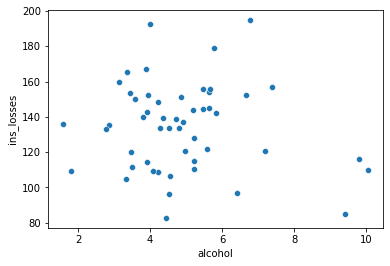

In [90]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df)

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

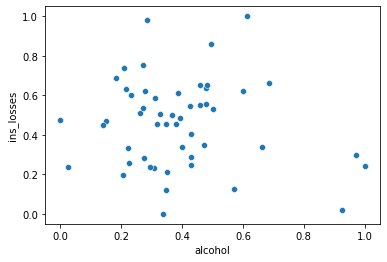

In [91]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfnorm)

### Finally `fit()` the Model

In [92]:
dfsel = df[['alcohol', 'ins_losses']].copy()

In [93]:
model.fit(X=dfnorm)

KMeans(n_clusters=3)

## `predict()` the Cluster for One `USA State`

> **Programming thiking:**
>
> - Which `function()` can we use to make a prediction?
> - How can you answer yourself **without searching in Google**?

In [94]:
ejemplo = dfnorm.sample()

In [95]:
ejemplo

,alcohol,ins_losses
abbrev,,
FL,0.426051,0.548335


In [96]:
model.predict(ejemplo)

array([2], dtype=int32)

## Get the `cluster` for all USA States

> - `model.` + `↹`

In [97]:
pred = model.predict(X=dfnorm)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [98]:
dfsel['cluster'] = pred

In [100]:
dfsel

,alcohol,ins_losses,cluster
abbrev,,,
AL,5.640,145.08,2
AK,4.525,133.93,1
AZ,5.208,110.35,1
AR,5.824,142.39,2
CA,3.360,165.63,2
CO,3.808,139.91,2
CT,3.888,167.02,2
DE,4.860,151.48,2
DC,1.593,136.05,1


## Model Visualization

> - You may `hue=` the points with the `cluster` column

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

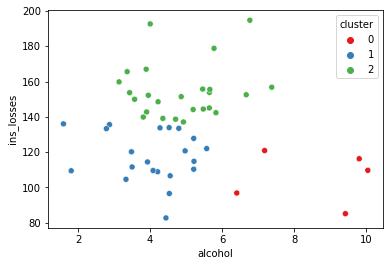

In [101]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')

In [102]:
import matplotlib.pyplot as plt

(0.0, 200.0)

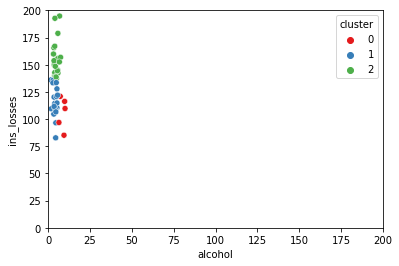

In [103]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)

# Other `Clustering` Models in Python

> - Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
> - **Pick 2 new models** and compute the *Clustering*

## Other Model 1

# `KMeans()` Model with *Scaled Data*

In [108]:
from sklearn.cluster import OPTICS

In [123]:
model = OPTICS(min_samples=10)

In [124]:
model.fit(X=dfnorm)

OPTICS(min_samples=10)

In [125]:
model.labels_

array([ 0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0,
        0, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1])

In [126]:
pred = model.fit_predict(X=dfnorm)

In [127]:
pred

array([ 0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0,
        0, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1])

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [128]:
dfsel['cluster'] = pred

In [129]:
dfsel

,alcohol,ins_losses,cluster
abbrev,,,
AL,5.640,145.08,0
AK,4.525,133.93,0
AZ,5.208,110.35,-1
AR,5.824,142.39,0
CA,3.360,165.63,-1
CO,3.808,139.91,0
CT,3.888,167.02,-1
DE,4.860,151.48,0
DC,1.593,136.05,-1


## Model Visualization

> - You may `hue=` the points with the `cluster` column

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

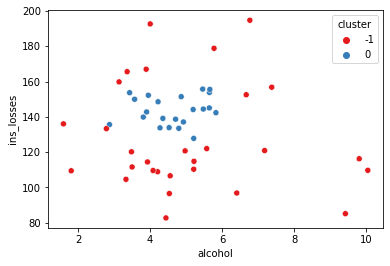

In [130]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')

In [131]:
import matplotlib.pyplot as plt

(0.0, 200.0)

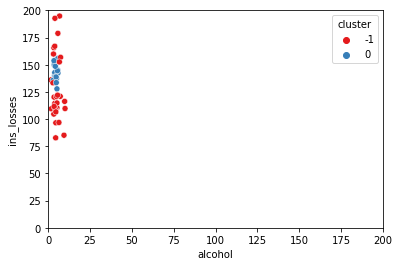

In [132]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)

## Other Model 2

In [133]:
from sklearn.cluster import AgglomerativeClustering

In [134]:
model = AgglomerativeClustering(n_clusters=3)

In [135]:
model.fit(X=dfnorm)

AgglomerativeClustering(n_clusters=3)

In [136]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1])

In [137]:
pred = model.fit_predict(X=dfnorm)

In [138]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1])

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [139]:
dfsel['cluster'] = pred

In [140]:
dfsel

,alcohol,ins_losses,cluster
abbrev,,,
AL,5.640,145.08,0
AK,4.525,133.93,0
AZ,5.208,110.35,1
AR,5.824,142.39,0
CA,3.360,165.63,0
CO,3.808,139.91,0
CT,3.888,167.02,0
DE,4.860,151.48,0
DC,1.593,136.05,0


## Model Visualization

> - You may `hue=` the points with the `cluster` column

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

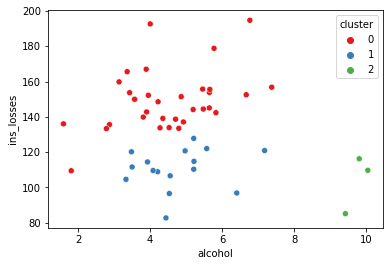

In [141]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')

In [142]:
import matplotlib.pyplot as plt

(0.0, 200.0)

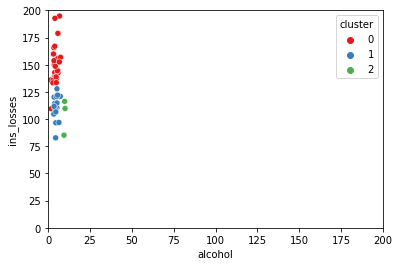

In [143]:
sns.scatterplot(x='alcohol', y='ins_losses', data=dfsel, hue='cluster', palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)